# Diffusion modeling
New to pynams? Check out the [intro and basic examples](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES.ipynb) and [peak fitting with pynams](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES_peakfitting.ipynbb)

## Some setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=["svg"]
from __future__ import print_function, division
import pynams
from pynams import Spectrum, Profile, Diffusivities, dlib, styles
from pynams.diffusion import models
import matplotlib.pyplot as plt
import os # package to figure out where pynams is on your computer

FTIR_file_location = os.path.join(pynams.__path__[0], 'example_FTIR_spectra\\')

spectrum = Spectrum(fname='augite1', folder=FTIR_file_location, thickness_microns=268.)

profile = Profile(fnames=['olivine1', 'olivine2', 'olivine3', 'olivine4'],  
                  folder=FTIR_file_location, 
                  thicknesses_microns=300., 
                  positions_microns=[10., 20., 30., 40.])

# 1D diffusion
Simple analytic solutions assuming diffusivity is independent of the diffusing species. 

Error functions (the default) are usually preferred for the early stages of diffusion, and the infinite sum (erf_or_sum='infsum') more accurately represents diffusion at later stages (Crank 1975, Section 2.1)

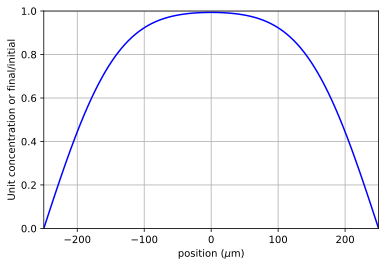

In [2]:
fig, ax, x_data, y_data = models.diffusion1D(length_microns=500., log10D_m2s=-12., time_seconds=3600.)

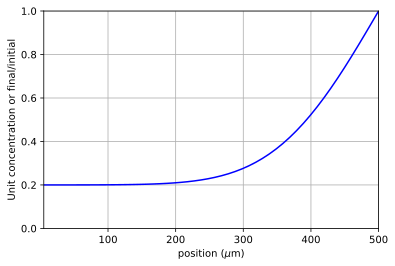

In [3]:
fig, ax, x_data, y_data = models.diffusion1D(length_microns=500, log10D_m2s=-12, time_seconds=2*3600,
                                             init=0.2, fin=1., symmetric=False, centered=False)

## Plot 1D diffusion profiles on top of your data
The plot_diffusion method combines plot_area_profile() with diffusion1D() and includes most of the same keywords. 

Got baseline  C:\Users\Elizabeth Ferriss\Documents\Code\Pynams\pynams\example_FTIR_spectra\olivine1-baseline.CSV
Got baseline  C:\Users\Elizabeth Ferriss\Documents\Code\Pynams\pynams\example_FTIR_spectra\olivine2-baseline.CSV
Got baseline  C:\Users\Elizabeth Ferriss\Documents\Code\Pynams\pynams\example_FTIR_spectra\olivine3-baseline.CSV
Got baseline  C:\Users\Elizabeth Ferriss\Documents\Code\Pynams\pynams\example_FTIR_spectra\olivine4-baseline.CSV


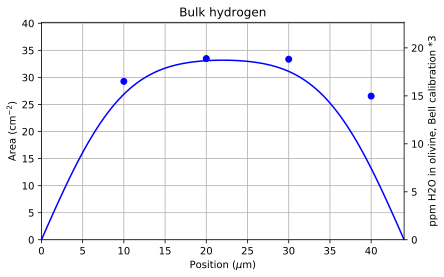

In [4]:
profile.get_baselines(folder=FTIR_file_location)
fig, ax, ax_water = profile.plot_diffusion(time_seconds=60*5, log10D_m2s=-13, centered=False)

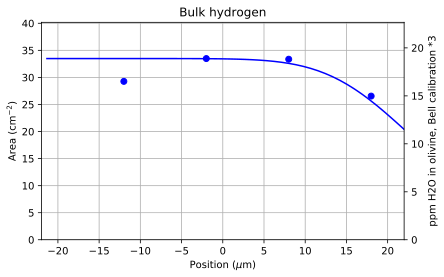

In [5]:
fig, ax, ax_water = profile.plot_diffusion(time_seconds=60*5, log10D_m2s=-13, centered=True, 
                                           fin=0.6, symmetric=False)

# Fit 1D diffusion data
Default solves for time while holding constant
* the initial constant = the maximum concentration (vary_initial=True)
* the log10 of the diffusivity in m2/s constant at -12
* the final concentration = zero  

Change these setting using keywords log10Dm2s, vary_initial, vary_final, varyD, vary_time, initial_unit_value, final_unit_value

initial: 33.48+/-0
final: 0.00+/-0
log10D m2/s: -12.00+/-0
minutes: 0.34+/-0.11


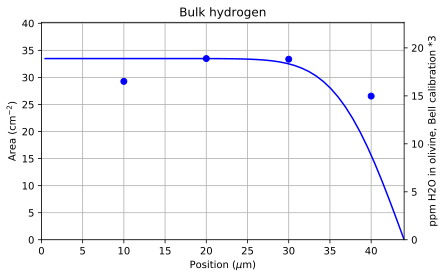

In [6]:
initial, final, log10D, minutes = profile.fitD(symmetric=False)

## Plot a range of possible diffusion curves

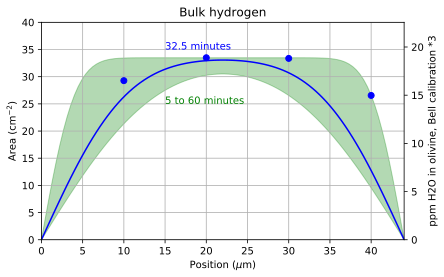

In [7]:
import numpy as np
time_minutes_long = 60
time_minutes_short = 5
time_minutes_average = np.mean((time_minutes_long, time_minutes_short))
log10D = -12.
centered = False

fig, ax, ax_water = profile.plot_diffusion(time_seconds=time_minutes_average, 
                                           log10D_m2s=log10D, 
                                           centered=centered, ytop=40)
label = ' '.join((str(time_minutes_average), 'minutes'))
ax.text(15, 35, label, color='b')

x, y1 = profile.diffusion1D(time_seconds=time_minutes_long, log10D_m2s=log10D, 
                         centered=centered)
x, y2 = profile.diffusion1D(time_seconds=time_minutes_short, log10D_m2s=log10D, 
                         centered=centered)
ax.fill_between(x, y1, y2, color='g', alpha=0.3);

label2 = ' '.join((str(time_minutes_short), 'to', str(time_minutes_long), 'minutes'))
ax.text(15, 25, label2, color='g');

## Some H diffusivities from the literature are stored in pynams

In [8]:
print('Olivine proton-polaron diffusion at 1000C')
dlib.pp.whatIsD(celsius=1000)

print('\nOlivine proton-vacancy diffusion at 1000C')
dlib.pv.whatIsD(celsius=1000);

Olivine proton-polaron diffusion at 1000C
-9.81760789768 || a
-11.1902176071 || b
-11.4044461195 || c
D0 or Ea = 0 || not oriented

Olivine proton-vacancy diffusion at 1000C
-12.8740178166 || a
-12.8740178166 || b
-11.9906695916 || c
D0 or Ea = 0 || not oriented


## 1D diffusion in a thin slab
See Eq 4.18 in Crank, 1975. C is the concentration

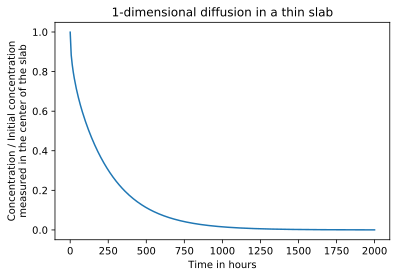

In [9]:
from pynams.diffusion import models
time_hours, c_over_c0 = models.diffusionThinSlab(log10D_m2s=-14., thickness_microns=300., 
                                                 max_time_hours=2000, timesteps=300)
plt.plot(time_hours, c_over_c0)
plt.xlabel('Time in hours')
plt.ylabel('Concentration / Initial concentration\nmeasured in the center of the slab')
plt.title('1-dimensional diffusion in a thin slab');

# [Click here for 3D diffusion](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES_diffusion3D.ipynb)